In [ ]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/nlp/news.csv',encoding='latin-1')
df.sample()

,text,subject,fake
278,"When it gets down to it, what this sheriff sai...",politics,0


In [ ]:
#dropping the subject column
df.drop(['subject'],axis=1,inplace=True)

In [ ]:
#checking null values
df.isnull().sum()

text    0
fake    0
dtype: int64

In [ ]:
df.dtypes

text    object
fake     int64
dtype: object

In [ ]:
#no null values present here
#there are 2 categories in this dataset and this is classification model

In [ ]:
df['fake'].value_counts()
#in nlp there is no concept of balancing the data.

1    204
0    204
Name: fake, dtype: int64

In [ ]:
#seeing the fake news category 
df[df['fake']==1]['text']

0      Donald Trump just couldn t wish all Americans ...
1      House Intelligence Committee Chairman Devin Nu...
2      On Friday, it was revealed that former Milwauk...
3      On Christmas day, Donald Trump announced that ...
4      Pope Francis used his annual Christmas Day mes...
                             ...                        
199    Tune in to the Alternate Current Radio Network...
200    Shawn Helton  21st Century WireWhen looking at...
201     Antifa (Photo: Twitter)Diana Johnstone 21st C...
202    TWO PROTAGONISTS: Jesus Campos, and alleged sh...
203    This latest move by America s notorious Transp...
Name: text, Length: 204, dtype: object

In [ ]:
#merging the fake news and and making a paragraph and then making the wordcloud of the fake news message
#merging usingjoin
content=''.join(df[df['fake']==1]['text'])
print(content)

Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t eve

In [ ]:
from wordcloud import WordCloud,STOPWORDS
#worcloud and stopword are inbuilt class of wordcloudpackage

In [ ]:
wc=WordCloud(width=800,height=800,background_color='green',stopwords=STOPWORDS,min_font_size=10)
#least repated value font min_font_size=10

In [ ]:
#using inbuilt method of wordcloud to draw the word cloud which is defined in wordcloud class
wc.generate(content)

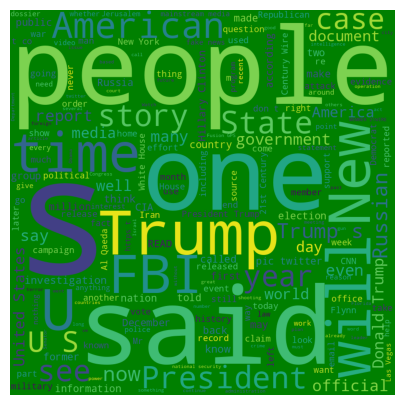

In [ ]:
#to show the wordcloud on output screen
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.imshow(wc)#imageshow which define in  matplotlib
plt.axis('off')
plt.show()

In [ ]:
#seeing the not  fake news category
df[df['fake']==0]['text']

204    Donald Trump just couldn t wish all Americans ...
205    House Intelligence Committee Chairman Devin Nu...
206    On Friday, it was revealed that former Milwauk...
207    On Christmas day, Donald Trump announced that ...
208    Pope Francis used his annual Christmas Day mes...
                             ...                        
403    Tune in to the Alternate Current Radio Network...
404    Shawn Helton  21st Century WireWhen looking at...
405     Antifa (Photo: Twitter)Diana Johnstone 21st C...
406    TWO PROTAGONISTS: Jesus Campos, and alleged sh...
407    This latest move by America s notorious Transp...
Name: text, Length: 204, dtype: object

In [ ]:
#merging the not fake news and and making a paragraph and then making the wordcloud of the not fake news message
#merging usingjoin
content=''.join(df[df['fake']==0]['text'])
print(content)

Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t eve

In [ ]:
#using inbuilt method of wordcloud to draw the word cloud which is defined in wordcloud class
wc.generate(content)

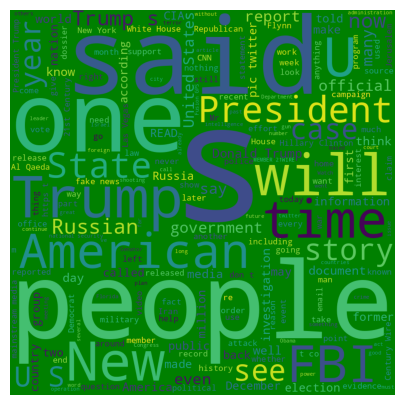

In [ ]:
#to show the wordcloud on output screen
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.imshow(wc)#imageshow which define in  matplotlib
plt.axis('off')
plt.show()

In [ ]:
import nltk
nltk.download('punkt')#puntk used for removing punctuation in text
nltk.download('wordnet')
nltk.download('stopwords')#stopwords used for removing common words such as the,in ,my in text
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#now preforming text preprocessing(text mining)
#seeing the list of stopwords
stop=stopwords.words('english')

In [ ]:
#create user definedfunction for text preprocessing
def clean_text(msg):
  #step 1 :first converts all messages in lower case
  msg=msg.lower()
  #step 2 :apply tokenizer
  tokens=word_tokenize(msg)
  #filtering only alphabets ,means to remove digit and special character(punctuation marks) then use inbuilt metghod isalpha()
  word_token=[w for w in tokens if w.isalpha()]
  #noiw removing stopwords
  clean_token=[w for w in word_token if w not in stop]
  #next step of preprocessin is lemmatization:
  #create the object of WordNetLemmatizer class
  lemma=WordNetLemmatizer()
  clean_token=[lemma.lemmatize(w) for w in clean_token]
  return ' '.join(clean_token)

In [ ]:
#call function means we apply the clean_text() on the entire column  of message dataset
df['text']=df['text'].apply(clean_text)#apply when we to take ine i=one input

In [ ]:
df['text'].head()

0    donald trump wish american happy new year leav...
1    house intelligence committee chairman devin nu...
2    friday revealed former milwaukee sheriff david...
3    christmas day donald trump announced would bac...
4    pope francis used annual christmas day message...
Name: text, dtype: object

In [ ]:
#select input and output
x=df['text']#input
y=df['fake']#output

In [ ]:
df.head()

,text,fake
0,donald trump wish american happy new year leav...,1
1,house intelligence committee chairman devin nu...,1
2,friday revealed former milwaukee sheriff david...,1
3,christmas day donald trump announced would bac...,1
4,pope francis used annual christmas day message...,1


In [ ]:
#split the data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
x_train.shape,x_test.shape

((285,), (123,))

In [ ]:
#Now once we have the clean text in hand, The next thing that we would like to do is convert the text 
#into vector/number.

#First , we trying the first technique : - CountVectorizer() : to converts text into vector/number
#first call class CountVectorizer inbuilt class
from sklearn.feature_extraction.text import CountVectorizer

#Create the object of CountVectorizer class
cv=CountVectorizer()

In [ ]:
#applying on x_train and x_test which is input
x_train_cv=cv.fit_transform(x_train)
x_test_cv=cv.transform(x_test)

In [ ]:
#to check the feature wich has been extarcted from msf after applying countvectroization
cv.get_feature_names_out()

array(['aaron', 'abaaoud', 'abandon', ..., 'zionist', 'zone',
       'zuckerberg'], dtype=object)

In [ ]:
x_train_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
pd.DataFrame(x_train_cv.toarray(),columns=cv.get_feature_names_out())

,aaron,abaaoud,abandon,abbe,abbottabad,abc,abcpolitics,abdel,abdelhakim,abdelhamid,...,zeak,zealand,zealous,zero,zia,zimdars,zimmer,zionist,zone,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
281,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
282,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
283,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#create a model with decision tree classifier algorithm
from sklearn.tree import DecisionTreeClassifier
dct=DecisionTreeClassifier(random_state=1)#by default it is taking gini index

In [ ]:
#now traning the  model wit 70% data
dct.fit(x_train_cv,y_train)#wehave to data whcih is in numver so we are givingx_train_cv

DecisionTreeClassifier(random_state=1)

In [ ]:

#now testing the model with 30% data
y_pred=dct.predict(x_test_cv)
y_pred

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1])

In [ ]:
#generating the report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.23      0.22      0.23        68
           1       0.09      0.09      0.09        55

    accuracy                           0.16       123
   macro avg       0.16      0.16      0.16       123
weighted avg       0.17      0.16      0.16       123

[[15 53]
 [50  5]]


In [ ]:
#score is good here but we cannot depend on count vector so we will check the accuracy with Tf-IDF vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#create the object
tfidf=TfidfVectorizer()

In [ ]:
x_train_tfidf=tfidf.fit_transform(x_train)
x_test_tfidf=tfidf.transform(x_test)

In [ ]:
#now traning the  model wit 70% data
dct.fit(x_train_tfidf,y_train)#wehave to data whcih is in numver so we are givingx_train_cv 

DecisionTreeClassifier(random_state=1)

In [ ]:
#now testing the model with 30% data
y_pred=dct.predict(x_test_tfidf)
y_pred

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.21      0.19      0.20        68
           1       0.11      0.13      0.12        55

    accuracy                           0.16       123
   macro avg       0.16      0.16      0.16       123
weighted avg       0.17      0.16      0.16       123



In [ ]:
print(confusion_matrix(y_test,y_pred))

[[13 55]
 [48  7]]


In [ ]:
#here tfidf is good bcz it give the weight of every words.